# The Use of Diffusion Algorithms for the Estimation of Construction Year Within Urban Models

## Annex B: Performance quantification of the model

[M. Esteban Muñoz H.](marcelo.hidalgo@hcu-hamburg.de) &
[Irene Peters](irene.peters@hcu-hamburg.de)

Technical Urban Infrastructure Systems Group, HafenCity University, Hamburg, Germany

#Table of Contents
1. [Import buildings data](#1.-Import-buildings-data)
2. [Select random sample](#2.-Select-random-sample)
3. [Estimate construction years](#3.-Estimate-construction-years)
4. [Performance](#4.-Performance)

In [1]:
import pandas as pd
from random import sample, seed
seed(12345)
import numpy as np
%matplotlib inline
from scripts.plots import plotPerformance

# 1. Import buildings data

In [2]:
#from scripts._fetchBuildingsPostgreSQL import _fetchBuildings
#Buildings = _fetchBuildings(saveBuildings=True)

In [3]:
Buildings = pd.read_hdf('data.h5', 'Buildings')

In [4]:
# Only residential buildings
# Buildings = Buildings.drop(Buildings[Buildings.baw.isnull()].index)

# 2. Select random sample

In [5]:
Buildings.shape

(1757, 10)

In [6]:
b_index = [index for index in Buildings.index.tolist() if not np.isnan(Buildings.loc[index, "bja"])]
Buildings_bja = Buildings.ix[b_index]

In [7]:
Buildings_s = Buildings_bja.sample(int(Buildings.shape[0] * 0.1))

In [8]:
Buildings_s.shape

(175, 10)

In [9]:
Buildings.loc[Buildings_s.index, "bja"] = np.nan

#3. Estimate construction years

In [10]:
from scripts._getByear import _getByear
Buildings = _getByear(Buildings, plot=False)

iter =  0
iter =  1
iter =  2
iter =  3
iter =  4
iter =  5
iter =  6


#4. Performance

In [11]:
estimated = Buildings.loc[Buildings_s.index, "bja"].tolist()
observed = Buildings_s.bja.tolist()
plotData = pd.DataFrame({"Estimated":estimated, "Observed":observed})

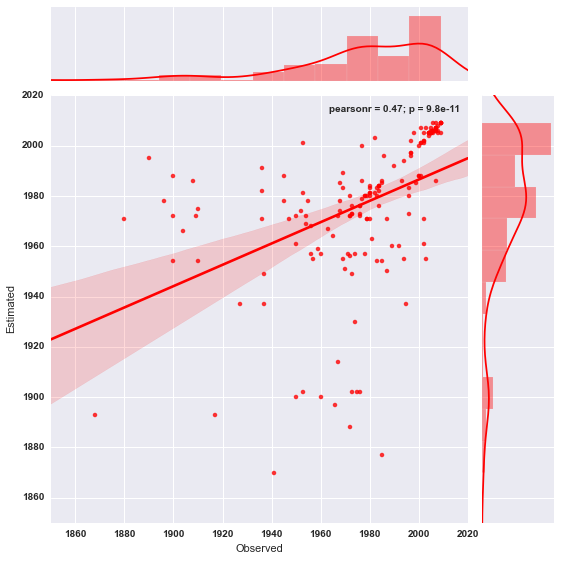

In [12]:
plotPerformance(plotData)

In [13]:
np.mean(abs(plotData.Estimated - plotData.Observed))

18.901734104046241

In [14]:
np.std(abs(plotData.Estimated - plotData.Observed))

26.887619847043471